In [1]:
from pathlib import Path
import sys

sys.path.append('/path/to/cnn-interaction-interpretability/src')

from visualization_functions import plot_filter_logo, filter_pdf
from data_generation import fetch_motifs

/home/marta/anaconda3/envs/nucleotran/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = Path('/home/marta/Desktop/model_code')
model_path = path / 'model_negseq.ckpt'

In [3]:
# Load model class
from models.cnn_classification_binary_4 import CNN

model = CNN.load_from_checkpoint(checkpoint_path = model_path).double()
model.eval()
# Load first layer
conv1 = model.conv1.weight.detach().numpy()

Lightning automatically upgraded your loaded checkpoint from v1.8.1 to v2.2.2. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../../../../Desktop/model_code/model_negseq.ckpt`


In [4]:
fig_path = Path('/home/marta/Desktop/model_code')
filename = 'filter_logo.pdf'

## Example

### Visualization filter

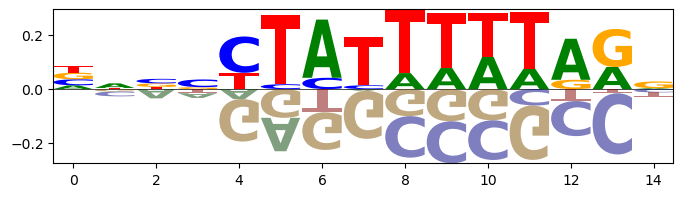

In [10]:
plot_filter_logo(conv1[1], neg = True)

In [11]:
filter_pdf(fig_path, filename, conv1, min_thresh=0.0001, neg=False)

### Visualization motifs

<Figure size 640x480 with 0 Axes>

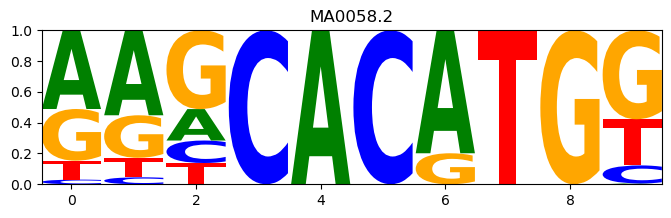

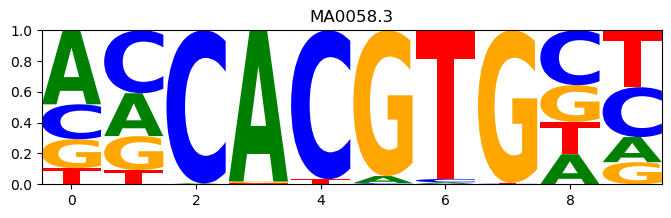

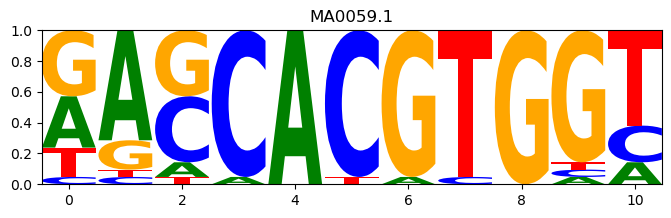

In [13]:
# PWMs
motif_pwms = fetch_motifs(['MA0058.1', 'MA0058.2', 'MA0058.3', 'MA0059.1'], id_or_name = 'id')
for m in motif_pwms:
    plot_filter_logo(motif_pwms[m], fig_path=path / str(m+'.svg'), svg=True, title=m)